In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to C:\Users\Namulametu
[nltk_data]     Keerthana\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to C:\Users\Namulametu
[nltk_data]     Keerthana\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to C:\Users\Namulametu
[nltk_data]     Keerthana\AppData\Roaming\nltk_data...


True

In [3]:
# Load datasets
fake_path = 'C:/Users/Namulametu Keerthana/Documents/projects/Fake News Detection/Fake.csv'

true_path = 'C:/Users/Namulametu Keerthana/Documents/projects/Fake News Detection/True.csv'


In [4]:
fake_df = pd.read_csv(fake_path)
true_df = pd.read_csv(true_path)

In [5]:
# Add labels
fake_df['label'] = 0  # Fake news
true_df['label'] = 1  # Real news

In [6]:
# Combine datasets
data = pd.concat([fake_df, true_df]).reset_index(drop=True)

In [8]:
# Data Exploration
print("\n--- Dataset Overview ---\\")
print(data.info())
print("\n--- Dataset Statistics ---\\")
print(data.describe())


--- Dataset Overview ---\
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB
None

--- Dataset Statistics ---\
              label
count  44898.000000
mean       0.477015
std        0.499477
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000


In [10]:
# Check for missing values
print("\n--- Missing Values ---\\")
print(data.isnull().sum())



--- Missing Values ---\
title      0
text       0
subject    0
date       0
label      0
dtype: int64


In [11]:
data.head

<bound method NDFrame.head of                                                    title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
44893  'Fully committed' NATO backs new U.S. approach...   
44894  LexisNexis withdrew two products from Chinese ...   
44895  Minsk cultural hub becomes haven from authorities   
44896  Vatican upbeat on possibility of Pope Francis ...   
44897  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text    subject  \
0      Donald Trump just couldn t wish all Americans ...       News   
1      House Intelligence Committee Chairman Devin Nu...       News   
2      On Friday, it was revealed th

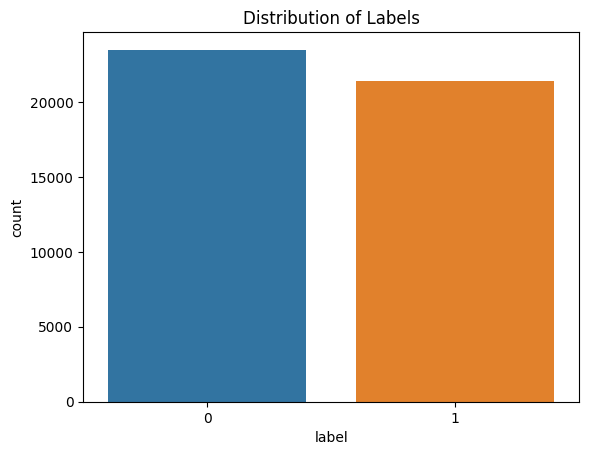

In [12]:
sns.countplot(x='label', data=data)
plt.title('Distribution of Labels')
plt.show()

In [16]:
def preprocess_text(text):
    import re
    from nltk.corpus import stopwords
    from nltk.stem import WordNetLemmatizer

    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    text = text.split()
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text if word not in stop_words]
    return ' '.join(text)

In [17]:

data['text'] = data['text'].apply(preprocess_text)

In [18]:
# Feature extraction
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['text']).toarray()
y = data['label']


In [19]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [22]:
# Model Evaluation
y_pred = model.predict(X_test)
print("\n--- Classification Report ---\\")
print(classification_report(y_test, y_pred))
print("\n--- Confusion Matrix ---\\")
print(confusion_matrix(y_test, y_pred))
print("\n--- Accuracy ---\\")
print(accuracy_score(y_test, y_pred))



--- Classification Report ---\
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4733
           1       0.98      0.99      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980


--- Confusion Matrix ---\
[[4669   64]
 [  49 4198]]

--- Accuracy ---\
0.9874164810690423


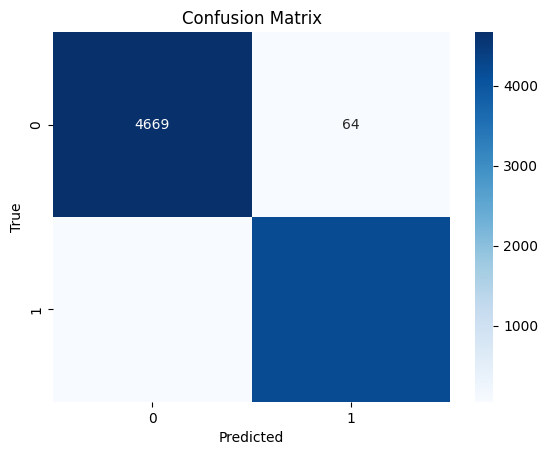

In [23]:
# Visualize Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [24]:
# Save Results
data['processed_text'] = data['text']  # Save processed text for reference
data.to_csv('processed_data.csv', index=False)


In [25]:
data['prediction'] = model.predict(vectorizer.transform(data['text']))  # Add predictions
data.to_csv('processed_data_with_predictions.csv', index=False)